# Chapter10-Decison Tree & LSTM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost

In [2]:
df = pd.read_csv("dataset_demand_forecasting_sd.csv")
df.head()

,Date,Sales
0,2014-01-01,11219
1,2014-01-02,12745
2,2014-01-03,10498
3,2014-01-04,12028
4,2014-01-05,13900


### Feature-Based:

In [3]:
def get_features(dataframe):
    dataframe["sales"] = dataframe["Sales"]
    dataframe["Date"] = pd.to_datetime(dataframe['Date'])
    dataframe['year'] = dataframe.Date.dt.year
    dataframe['month'] = dataframe.Date.dt.month
    dataframe['day'] = dataframe.Date.dt.day
    dataframe['dayofyear'] = dataframe.Date.dt.dayofyear
    dataframe['dayofweek'] = dataframe.Date.dt.dayofweek
    dataframe['weekofyear'] = dataframe.Date.dt.weekofyear
    return dataframe.drop(columns=["Date", "Sales"])


In [4]:
df2 = get_features(df)

<ipython-input-3-3e386bc9c837>:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  dataframe['weekofyear'] = dataframe.Date.dt.weekofyear


In [5]:
df2

,sales,year,month,day,dayofyear,dayofweek,weekofyear
0,11219,2014,1,1,1,2,1
1,12745,2014,1,2,2,3,1
2,10498,2014,1,3,3,4,1
3,12028,2014,1,4,4,5,1
4,13900,2014,1,5,5,6,1
...,...,...,...,...,...,...,...
2542,103271,2020,12,19,354,5,51
2543,100373,2020,12,20,355,6,51
2544,99687,2020,12,21,356,0,52
2545,115992,2020,12,22,357,1,52


In [6]:
X = df2.drop(columns=["sales"])
y = df2.sales

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
X_scaled

array([[-1.49903102e+00, -1.59985075e+00, -1.67110177e+00,
        -1.72703780e+00, -5.00711898e-01, -1.70133522e+00],
       [-1.49903102e+00, -1.59985075e+00, -1.55732443e+00,
        -1.71751942e+00, -5.89072821e-04, -1.70133522e+00],
       [-1.49903102e+00, -1.59985075e+00, -1.44354710e+00,
        -1.70800105e+00,  4.99533752e-01, -1.70133522e+00],
       ...,
       [ 1.50689892e+00,  1.59927982e+00,  6.04444866e-01,
         1.65198576e+00, -1.50095755e+00,  1.69696624e+00],
       [ 1.50689892e+00,  1.59927982e+00,  7.18222197e-01,
         1.66150413e+00, -1.00083472e+00,  1.69696624e+00],
       [ 1.50689892e+00,  1.59927982e+00,  8.31999529e-01,
         1.67102251e+00, -5.00711898e-01,  1.69696624e+00]])

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25)

In [9]:
model = xgboost.XGBRegressor(n_estimators=1000)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=1000, n_jobs=16, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [10]:
y_pred = model.predict(X_test)

In [11]:
from sklearn.metrics import r2_score

In [12]:
r2_score(y_pred, y_test)

0.8401057407023411

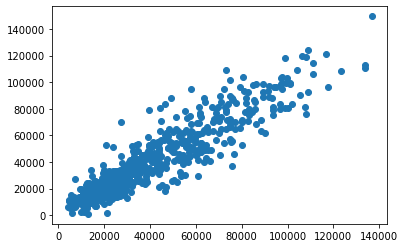

In [13]:
plt.scatter(y_pred, y_test)

In [14]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

C:\Users\Saleh Alkhalifa\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [15]:
r2_score(y_pred, y_test)

0.8611340629839059

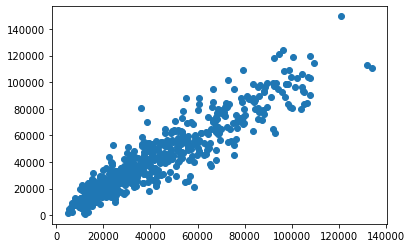

In [16]:
plt.scatter(y_pred, y_test)

### Timeseries Based

In [17]:
df.head()

,Date,Sales,sales,year,month,day,dayofyear,dayofweek,weekofyear
0,2014-01-01,11219,11219,2014,1,1,1,2,1
1,2014-01-02,12745,12745,2014,1,2,2,3,1
2,2014-01-03,10498,10498,2014,1,3,3,4,1
3,2014-01-04,12028,12028,2014,1,4,4,5,1
4,2014-01-05,13900,13900,2014,1,5,5,6,1


In [18]:
len(df)

2547

In [58]:
df['sales'] = df["sales"].rolling(window=10).mean()
df = df.dropna()

In [59]:
training = df[df["Date"]< '2018-01-01'].sales.values.reshape(-1, 1)
testing = df[df["Date"]>= '2018-01-01'].sales.values.reshape(-1, 1)

In [60]:
training

array([[12093.31],
       [11955.33],
       [11849.01],
       ...,
       [51828.33],
       [52725.37],
       [53662.3 ]])

In [61]:
testing

array([[ 54702.21],
       [ 55618.75],
       [ 56495.66],
       ...,
       [101385.99],
       [101238.87],
       [100938.08]])

In [62]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [63]:
df

,Date,Sales,sales,year,month,day,dayofyear,dayofweek,weekofyear
18,2014-01-19,9641,12093.31,2014,1,19,19,6,3
19,2014-01-20,9138,11955.33,2014,1,20,20,0,4
20,2014-01-21,12693,11849.01,2014,1,21,21,1,4
21,2014-01-22,11328,11731.34,2014,1,22,22,2,4
22,2014-01-23,10480,11599.99,2014,1,23,23,3,4
...,...,...,...,...,...,...,...,...,...
2542,2020-12-19,103271,100948.76,2020,12,19,354,5,51
2543,2020-12-20,100373,101233.59,2020,12,20,355,6,51
2544,2020-12-21,99687,101385.99,2020,12,21,356,0,52
2545,2020-12-22,115992,101238.87,2020,12,22,357,1,52


In [64]:
dataset = df[["sales"]].values
dataset = dataset.astype('float32')

In [65]:
dataset

array([[ 12093.31],
       [ 11955.33],
       [ 11849.01],
       ...,
       [101385.99],
       [101238.87],
       [100938.08]], dtype=float32)

In [66]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [67]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

1694 835


In [68]:
import numpy as np
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [99]:
look_back = 100
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [100]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [101]:
model = Sequential()
model.add(LSTM(2, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
1593/1593 - 2s - loss: 0.0031
Epoch 2/10
1593/1593 - 1s - loss: 7.3011e-04
Epoch 3/10
1593/1593 - 1s - loss: 4.8726e-04
Epoch 4/10
1593/1593 - 1s - loss: 4.3167e-04
Epoch 5/10
1593/1593 - 1s - loss: 3.4244e-04
Epoch 6/10
1593/1593 - 1s - loss: 3.0486e-04
Epoch 7/10
1593/1593 - 1s - loss: 2.8497e-04
Epoch 8/10
1593/1593 - 1s - loss: 2.3587e-04
Epoch 9/10
1593/1593 - 1s - loss: 2.1363e-04
Epoch 10/10
1593/1593 - 1s - loss: 1.9356e-04


In [102]:
trainY.ravel()

array([0.04048525, 0.0380392 , 0.03481208, ..., 0.3572542 , 0.35555923,
       0.3532729 ], dtype=float32)

In [103]:
import math
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY.ravel()])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY.ravel()])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1162.75 RMSE
Test Score: 10369.00 RMSE


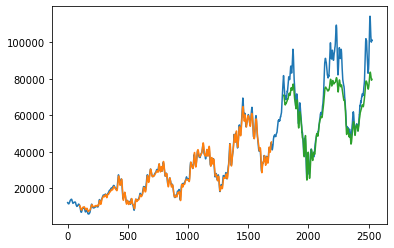

In [104]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()